In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_rows = 2000

In [3]:
df = pd.read_csv('diabetes.csv')

### EDA

In [4]:
df.shape

(2000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


* There're no NULL values

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
# Frequency of target class 'Outcome'

df.Outcome.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [8]:
# Summary statistics of the data

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Insulin'}>],
       [<AxesSubplot:title={'center':'Outcome'}>,
        <AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>]], dtype=object)

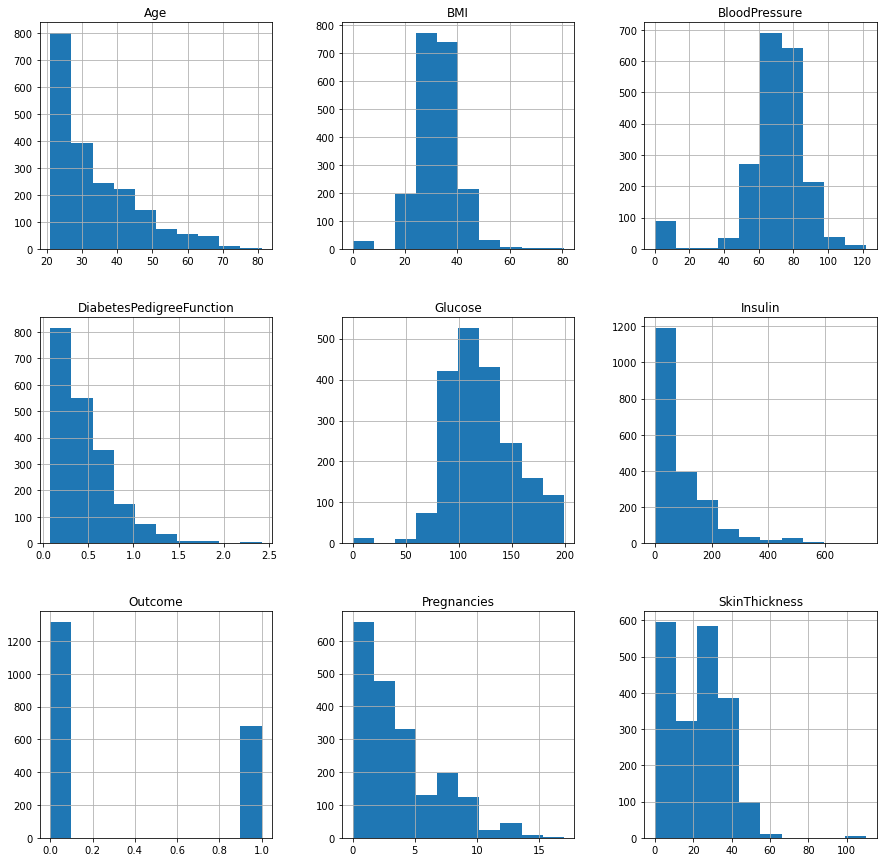

In [10]:
df.hist(figsize=(15, 15))

In [11]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

In [12]:
temp = df.copy()

In [13]:
def countplots(data):
    for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=col, data=data)
        plt.show()

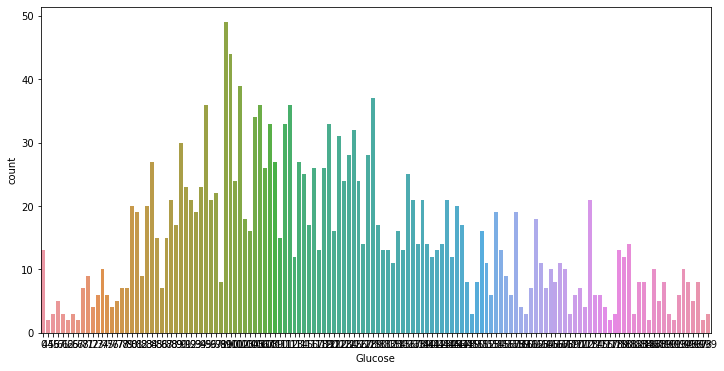

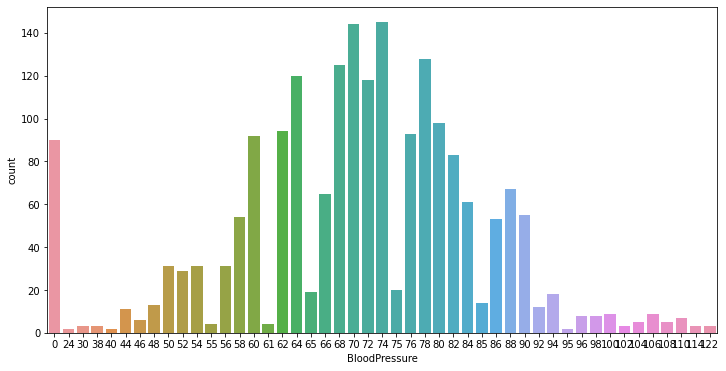

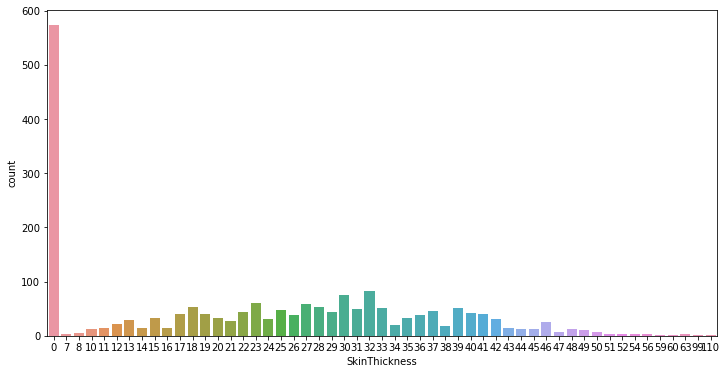

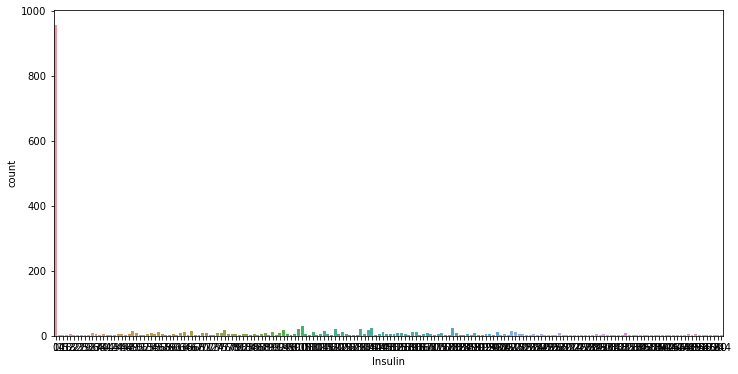

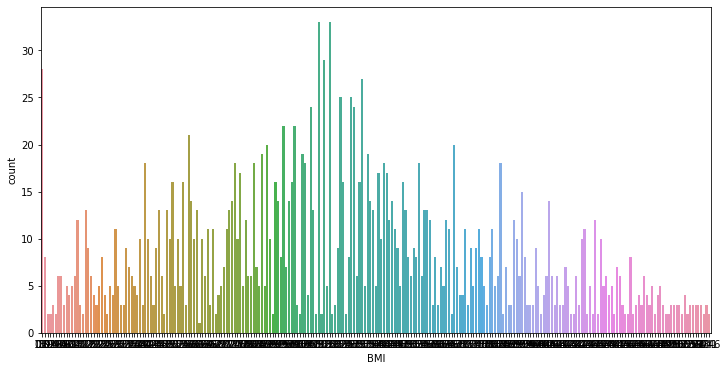

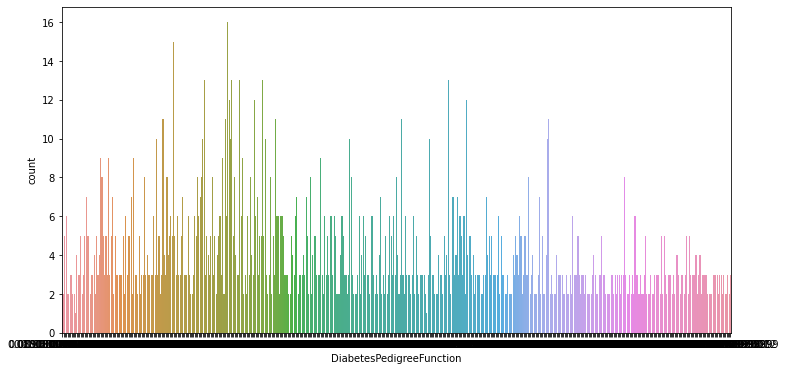

In [14]:
countplots(temp)

* From the plot it's clear that several attributes have values of 'zero'.
* For most attributes it could indicate erranous values, can be replaced with attribute central tendencies.

In [15]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    temp[col] = temp[col].replace(0, np.nan)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Insulin'}>],
       [<AxesSubplot:title={'center':'Outcome'}>,
        <AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>]], dtype=object)

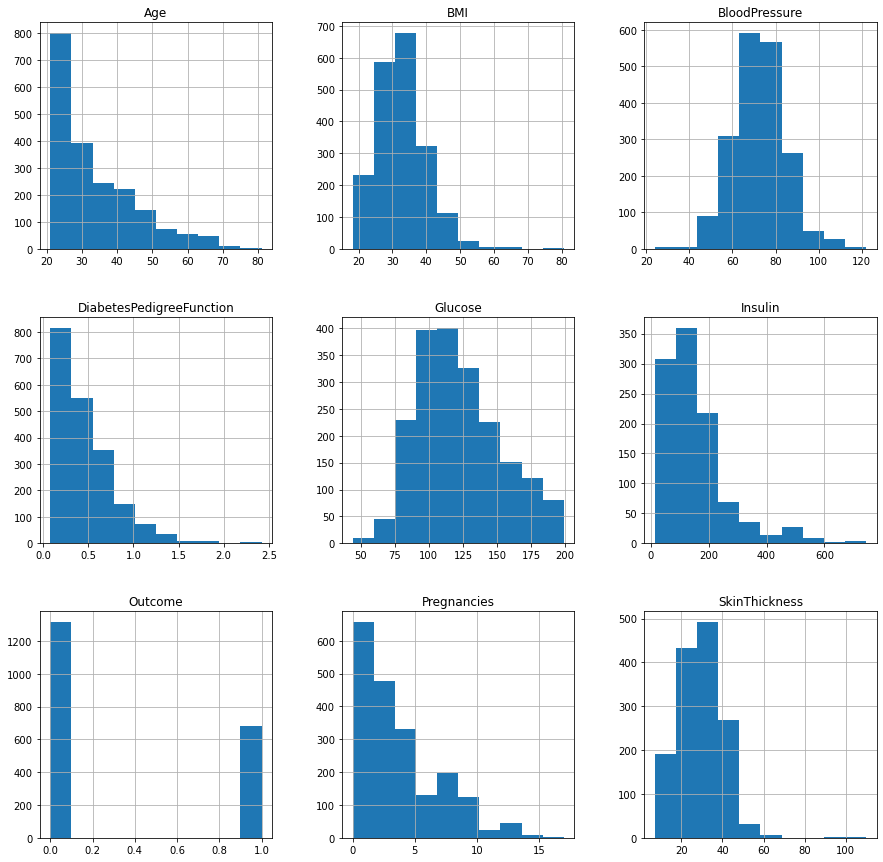

In [16]:
temp.hist(figsize=(15, 15))

In [17]:
temp.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    temp[col].fillna(temp[col].mean(), inplace=True)

In [19]:
temp['Insulin'].fillna(temp['Insulin'].median(), inplace=True)

In [20]:
temp.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

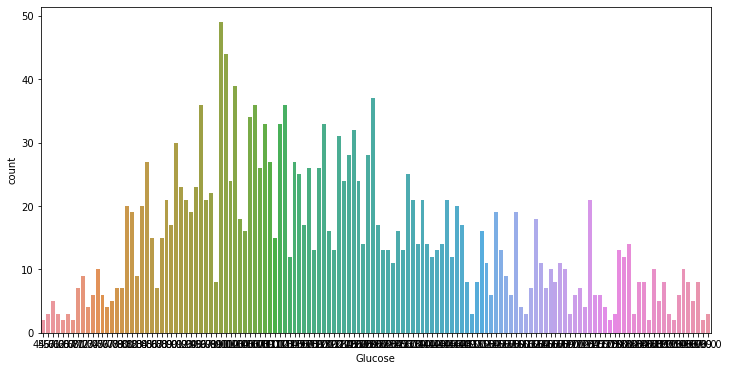

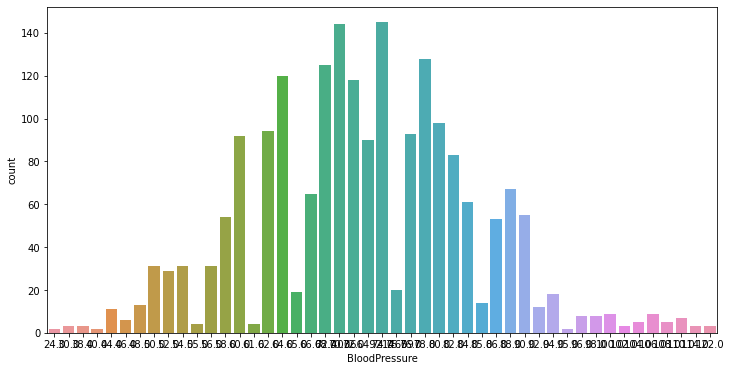

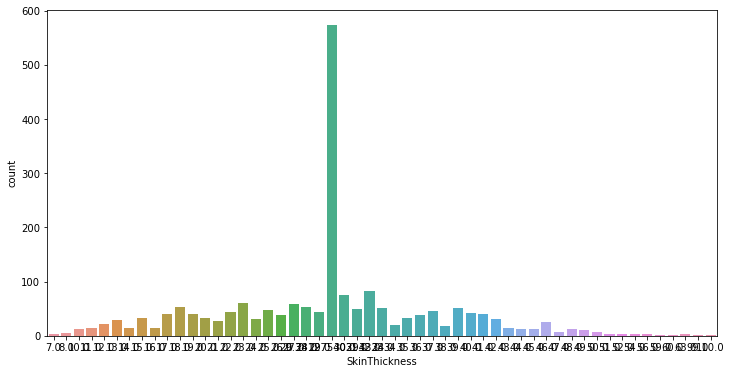

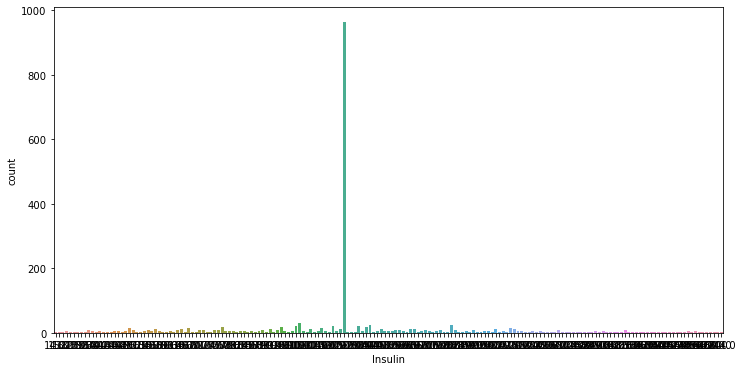

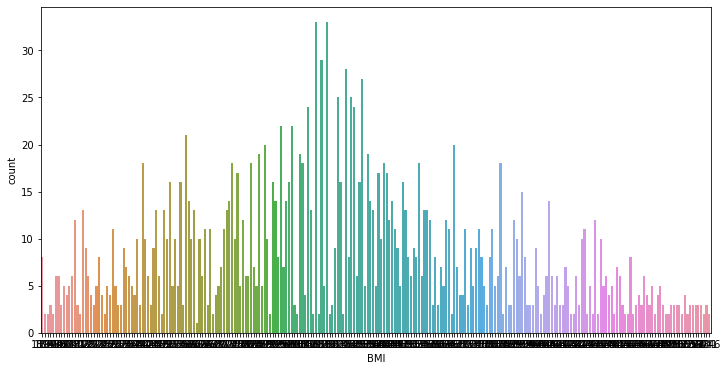

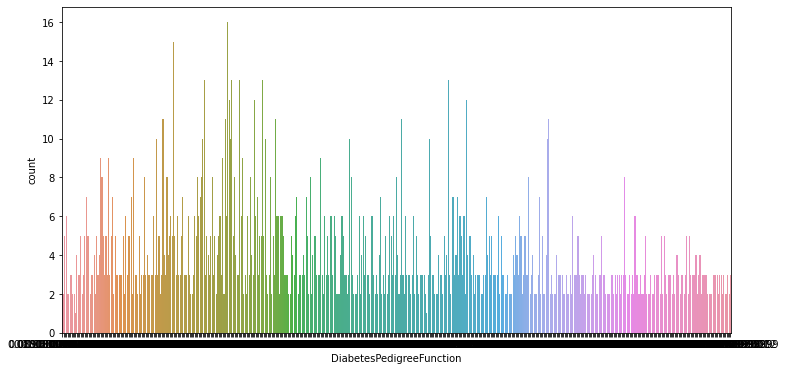

In [21]:
countplots(temp)

In [22]:
def boxplots(data):
    cols = [x for x in df.columns if x != 'Outcome']
    for col in cols:
        plt.figure()
        sns.boxplot(y=col, x='Outcome', data=data)
        plt.show()

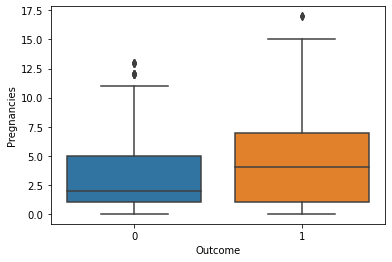

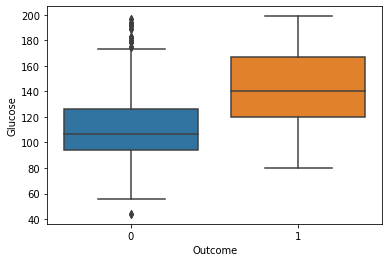

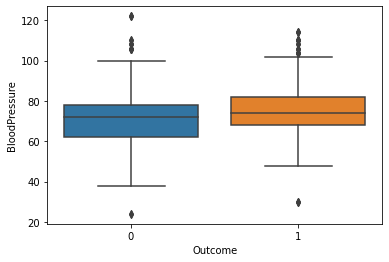

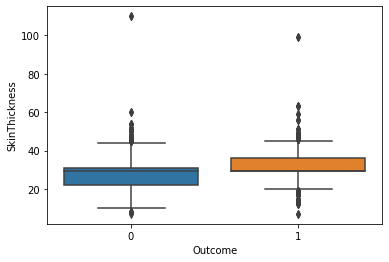

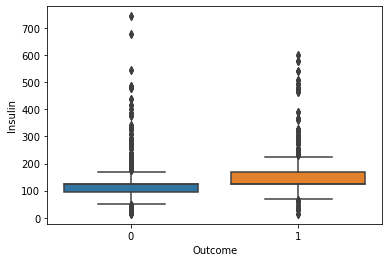

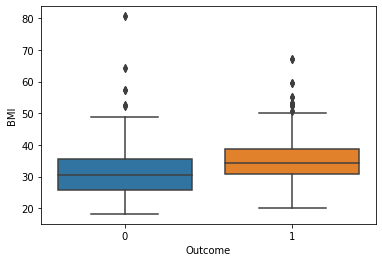

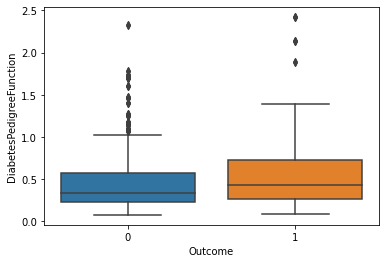

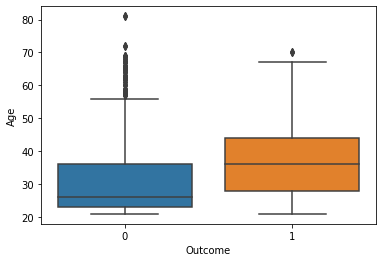

In [23]:
boxplots(temp)

* As can be observed from the boxplots, most features differentiate well among the target classes.
* Thus most features seem useful.

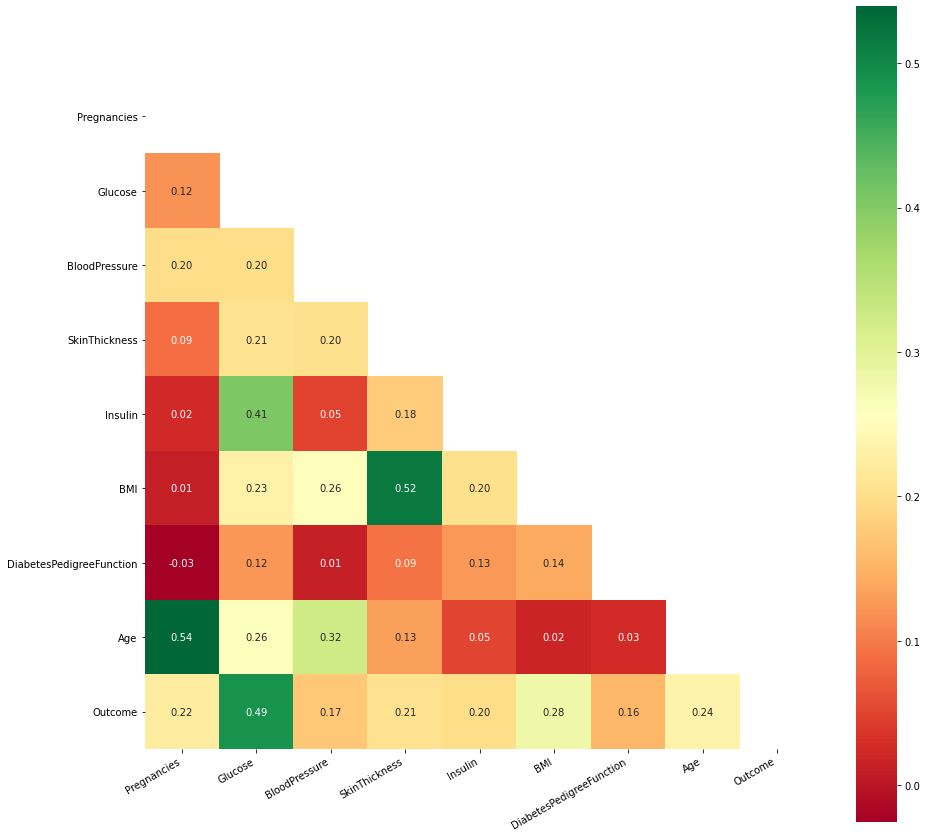

In [24]:
plt.figure(figsize=(15, 15))

cmat = temp.corr()

mask = np.zeros_like(cmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

hm = sns.heatmap(cmat, annot=True, square=True, cbar=True, mask=mask, fmt='0.2f', cmap='RdYlGn',
                 yticklabels=True, xticklabels=True)

hm.set_xticklabels(cmat.columns, rotation=30, horizontalalignment='right')
hm.set_yticklabels(cmat.columns)

plt.show()

* Almost all features show decent positive correlation with the target variable.

### Train - Test split

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

In [26]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)

for train_idx, test_idx in split.split(temp, temp['Outcome']):
    temp_train = temp.loc[train_idx]
    temp_test = temp.loc[test_idx]

In [27]:
temp_train['Outcome'].value_counts(normalize=True)

0    0.658125
1    0.341875
Name: Outcome, dtype: float64

In [28]:
temp_test['Outcome'].value_counts(normalize=True)

0    0.6575
1    0.3425
Name: Outcome, dtype: float64

### Saving the Training and Testing data

In [29]:
temp_train.to_csv('train.csv', index=False)
temp_test.to_csv('test.csv', index=False)

In [30]:
temp_train = pd.read_csv('train.csv')
temp_test = pd.read_csv('test.csv')

In [31]:
x_train = temp_train.drop('Outcome', axis=1)
y_train = temp_train['Outcome']

x_test = temp_test.drop('Outcome', axis=1)
y_test = temp_test['Outcome']

### Model Selection

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline

In [33]:
seed = 7

In [34]:
sft_max = LogisticRegression(multi_class='multinomial', random_state=seed)
rnfc = RandomForestClassifier(max_depth=6, random_state=seed)
gbc = GradientBoostingClassifier(max_features='auto', random_state=seed)
adbc = AdaBoostClassifier(random_state=seed)
svc = SVC(random_state=seed)
knn = KNeighborsClassifier()

In [35]:
models = [sft_max, rnfc, gbc, adbc, svc, knn]

In [36]:
def check_models(models):
    
    for model in models:
        
        if model.__class__.__name__ in ('RandomForestClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier'):
            clf = Pipeline(steps=[('clf', model)])
        else:
            clf = Pipeline(steps=[('scaler', StandardScaler()),
                                  ('clf', model)])
        
        val_scores = cross_val_score(clf, x_train, y_train)
        val_score = np.mean(val_scores)
        
        print(f"........... Training {clf['clf']} ............. ")
        print(f'Validation score: {val_score}\n')

In [37]:
check_models(models)

........... Training LogisticRegression(multi_class='multinomial', random_state=7) ............. 
Validation score: 0.771875

........... Training RandomForestClassifier(max_depth=6, random_state=7) ............. 
Validation score: 0.8325000000000001

........... Training GradientBoostingClassifier(max_features='auto', random_state=7) ............. 
Validation score: 0.858125

........... Training AdaBoostClassifier(random_state=7) ............. 
Validation score: 0.7975

........... Training SVC(random_state=7) ............. 
Validation score: 0.8231249999999999

........... Training KNeighborsClassifier() ............. 
Validation score: 0.79625



* Further performing hyper-parameter tuning on the __Random Forest__ and __Gradient Boosting__ classifiers.

In [38]:
from sklearn.model_selection import RandomizedSearchCV

#### Tuning the Random Forest classifier

In [39]:
params = {
    
    'n_estimators': [n for n in range(50, 201, 8)],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'max_features': ['auto', 'log2']    
}

In [40]:
rnfcgs = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=seed), 
                            param_distributions=params, 
                            n_iter=100, 
                            cv=5, 
                            random_state=seed)

rnfcgs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [50, 58, 66, 74, 82, 90,
                                                         98, 106, 114, 122, 130,
                                                         138, 146, 154, 162,
                                                         170, 178, 186, 194]},
                   random_state=7)

In [41]:
rnfcgs.best_score_

0.911875

In [42]:
rnfcgs.best_params_

{'n_estimators': 74,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini'}

#### Tuning the Gradient Boosting classifier

In [43]:
params = {
    
    'n_estimators': [n for n in range(50, 201, 8)],
    'learning_rate': [1, 0.5, 0.1, 0.05, 0.01],
    'max_depth': [1, 3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.8, 0.9, 1] ,
}

In [44]:
gbcrs = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=seed), 
                           param_distributions=params, 
                           n_iter=100, 
                           cv=5, 
                           random_state=seed)

gbcrs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=7),
                   n_iter=100,
                   param_distributions={'learning_rate': [1, 0.5, 0.1, 0.05,
                                                          0.01],
                                        'max_depth': [1, 3, 5, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [50, 58, 66, 74, 82, 90,
                                                         98, 106, 114, 122, 130,
                                                         138, 146, 154, 162,
                                                         170, 178, 186, 194],
                                        'subsample': [0.8, 0.9, 1]},
                   random_state=7)

In [45]:
gbcrs.best_score_

0.9581250000000001

In [46]:
gbcrs.best_params_

{'subsample': 1,
 'n_estimators': 170,
 'max_features': 'sqrt',
 'max_depth': 3,
 'learning_rate': 0.5}

In [47]:
def _score(model):
    
    from sklearn.base import clone
    
    clf = clone(model)
    
    val_scores = cross_val_score(clf, x_train, y_train, cv=5)
    val_score = np.mean(val_scores)
    
    print(f'........ {clf.__class__.__name__} .........')
    print(f'Validation score: {val_score}')

### Final Validation score check

In [64]:
rnfc = RandomForestClassifier(n_estimators=74, 
                              max_features='log2', 
                              max_depth=8, 
                              criterion='gini', 
                              random_state=seed)

_score(rnfc)

........ RandomForestClassifier .........
Validation score: 0.911875


In [84]:
gbc = GradientBoostingClassifier(n_estimators=170, 
                                 max_features='sqrt', 
                                 max_depth=3, 
                                 learning_rate=0.5, 
                                 subsample=1, 
                                 random_state=seed)

_score(gbc)

........ GradientBoostingClassifier .........
Validation score: 0.9581250000000001


#### Training an Ensemble of Random forest and Gradient boosting classifiers

In [66]:
rnf_gbc = VotingClassifier(estimators=[('random_forest', rnfc), 
                                       ('gradient_boosting', gbc)], 
                           voting='soft')

_score(rnf_gbc)

........ VotingClassifier .........
Validation score: 0.95375


### Making predictions on the test data

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

#### Gradient Boosting Classifier

In [67]:
def evaluations(model):
    
    from sklearn.base import clone 
    
    clf = clone(model)
    
    clf.fit(x_train, y_train)
    
    test_pred = clf.predict(x_test)
    train_pred = clf.predict(x_train)
    
    test_score = accuracy_score(y_test, test_pred)
    train_score = accuracy_score(y_train, train_pred)
    
    print(f'....... {clf.__class__.__name__} ........')
    print(f'Accuracy on Train data: {train_score}')
    print(f'Accuracy on Test data: {test_score}')
    
    return test_pred

In [68]:
pred = evaluations(gbc)

....... GradientBoostingClassifier ........
Accuracy on Train data: 1.0
Accuracy on Test data: 0.985


In [69]:
conf_mat = confusion_matrix(y_test, pred)
conf_mat

array([[257,   6],
       [  0, 137]], dtype=int64)

In [70]:
def con_mat(mat):
    
    plt.figure(figsize=(10, 10))
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    
    hm = sns.heatmap(mat, 
                     cmap='Greens', 
                     annot=True, 
                     square=True, 
                     cbar=True, 
                     fmt='g')
    
    plt.title('Confusion Matrix Heatmap', fontsize=15)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('Actual Labels', fontsize=12)
    
    plt.show()

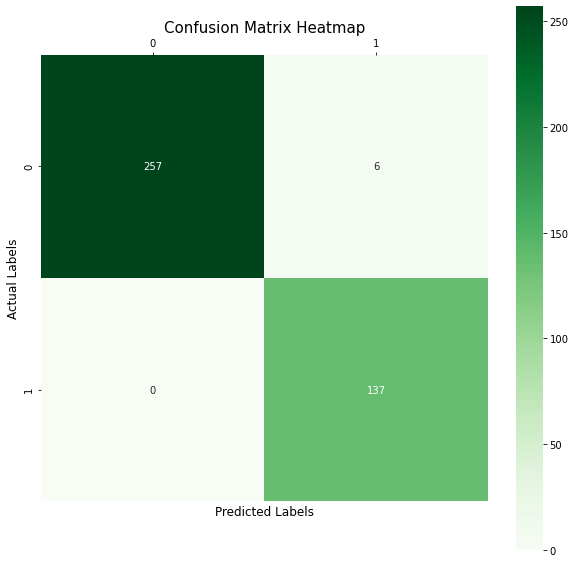

In [71]:
con_mat(conf_mat)

In [72]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       263
           1       0.96      1.00      0.98       137

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400



#### Random Forest Classifier

In [73]:
pred = evaluations(rnfc)

....... RandomForestClassifier ........
Accuracy on Train data: 0.9625
Accuracy on Test data: 0.92


#### Ensemble Classifier

In [75]:
pred = evaluations(rnf_gbc)

....... VotingClassifier ........
Accuracy on Train data: 1.0
Accuracy on Test data: 0.985


In [76]:
conf_mat = confusion_matrix(y_test, pred)
conf_mat

array([[257,   6],
       [  0, 137]], dtype=int64)

* Among the tuned Random forest, Gradient boosting, and the Ensemble classifiers, the __Gradient Boosting__ and the __Ensemble__ classifiers performs the best, and identical too.
* For the sake of model simplicity, the __Gradient Boosting__ classifier will be used to make final predictions.

### Saving the model

In [1]:
import joblib

In [85]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features='sqrt',
                           n_estimators=170, random_state=7, subsample=1)

In [86]:
joblib.dump(gbc, 'final_model')

['final_model']

In [2]:
model = joblib.load('final_model')

In [3]:
import pickle

In [4]:
pickle.dump(model, open('diabetes_model.pkl', 'wb'))

In [5]:
model = pickle.load(open('diabetes_model.pkl', 'rb'))

### Making new predictions

In [6]:
def make_prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    
    p = int(Pregnancies)
    g = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    ins = float(Insulin)
    bmi = float(BMI)
    dpf = float(DiabetesPedigreeFunction)
    age = int(Age)
    
    data = [[p, g, bp, st, ins, bmi, dpf, age]]
    
    return model.predict(data)[0]  

In [8]:
result = make_prediction(1, 117, 88, 24, 145, 34.5, 0.403, 40)

if result:
    print('Sorry! You have diabetes.')
else:
    print("You don't have diabetes!")

Sorry! You have diabetes.
